# ``imea`` Demo: 3D shape measurements

In this demo notebook the usage of of the open source Python package ``imea`` is demonstrated by extracting 3D as well as 2D shape measurements from grayscale height images. The height images presented here are obtained by a 3D laser triangulation test rig of the [Department of Anthropogenic Material Cycles](https://www.ants.rwth-aachen.de) at [RWTH Aachen University](https://www.rwth-aachen.de).

**Note: Please install imea using ``pip install imea`` before using this notebook.**

In [11]:
import imea

from pathlib import Path
from skimage import io, morphology, draw
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# better plots in matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['image.cmap'] = 'gray'

# show all columns in pandas
pd.set_option('display.max_columns', None)

## (1) Get grayscale heightmap and spatial resolution in x-y and z-direction
Extracting 3D shape measurements with ``imea`` is based on grayscale heightmaps, which is a typical dataformat e.g. from 3D lasertriangulation recordings. In such a grayscale heightmap, grayvalues represented the height of each pixel starting from black (height = 0). Thus the "brighter" a pixel in such a height map is, the heigher the corrosponding position is.

### (1.1) Read grayscale heightmap
In this example we load a 3D test image from the ``imea`` repository, which are given as grayscale .png images.

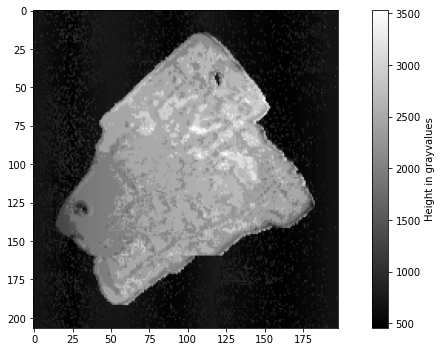

In [14]:
filename = r"weee1.png" # change here to test other images
path_example_imgs = Path(r"./example_imgs/3dlt")
fullfilename = path_example_imgs / filename

img_3d = io.imread(fullfilename)

fig, ax = plt.subplots()
pl = ax.imshow(img_3d)
cbar = fig.colorbar(pl, ax=ax)
cbar.set_label('Height in grayvalues')
plt.tight_layout()
plt.show()

### (1.3) Define spatial resolution(s) of image
Next we define the spatial resolution in x (length), y (width) and z-direction (height). If your image has not quadratic pixels, i.e. the spacial resolution is different in x- and y-direction, you may use ``skimage.transform.rescale()`` to rescale your image.

In our example the spatial resolution in x and y direction is given as a textfile:

In [17]:
with open(Path(r"./example_imgs/3dlt/spatial_resolution_xy_mm_per_px.txt"), 'r') as f:
    spatial_resolution_xy = float(f.read())
     
print("Spatial resolution in x and y-direction is: {:0.5f} mm/Pixel.".format(spatial_resolution_xy))

Spatial resolution in x and y-direction is: 0.36475 mm/Pixel.


Similar for the spatial resolution in z-direction:

In [20]:
with open(Path(r"./example_imgs/3dlt/spatial_resolution_z_mm_per_gv.txt"), 'r') as f:
    spatial_resolution_z = float(f.read())
     
print("Spatial resolution in z-direction is: {:0.5f} mm/grayvalue.".format(spatial_resolution_z))

Spatial resolution in z-direction is: 0.00153 mm/grayvalue.


### (1.4) Define spatial resolution of image

Next we define a threshold (in millimeter) to differenciate between object and background. Grayvalues lower the this threshold are treated as background, the other ones as an object. This is an important step, as the background might contain noise, which can disturb the precise calculation of 2D and 3D shape measurements.

In our example we choose:

In [22]:
threshold_mm = 2.0 # mm

Let us test the chosen threshold:

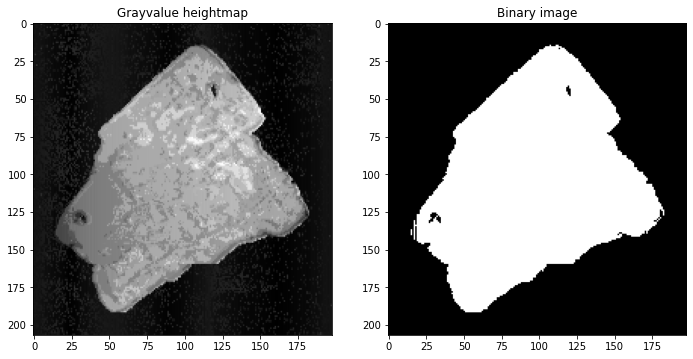

In [24]:
fig, axarr = plt.subplots(1,2)

# transform threshold from millimeter to grayvalues
# based on the given spatial resoltion in z-direction
threshold_gv = threshold_mm / spatial_resolution_z

axarr[0].imshow(img_3d)
axarr[0].set_title("Grayvalue heightmap")
axarr[1].imshow(img_3d > threshold_gv)
axarr[1].set_title("Binary image")
plt.tight_layout()
plt.show()

## (2) Extract 2D and 3D shape measurements with ``imea``
Now, we can extract the 2D and 3D shape measurements with ``imea``:

In [26]:
df_2d, df_3d = imea.shape_measurements_3d(img_3d, threshold_mm, spatial_resolution_xy, spatial_resolution_z, dalpha=9)

The resulting 2D and 3D shape measurements are returned as ``pandas`` dataframes:

In [28]:
df_3d

volume  volume_convexhull  surface_area  diameter_volume_equivalent  \
0  7959.739984       11194.144415   5514.133614                   24.772324   

   diameter_surfacearea_equivalent  width_3d_bb  length_3d_bb  height_3d_bb  \
0                        41.895146    57.784234     51.368983       5.39559   

   feret_3d_max  feret_3d_min   x_max_3d   y_max_3d   z_max_3d  
0     68.422597       5.39559  68.422597  57.994457  13.495565

In [30]:
df_2d

perimeter  convex_perimeter  area_projection  area_filled  area_convex  \
0  242.006315        196.622403      2185.696468  2191.683219  2398.558745   

   major_axis_length  minor_axis_length  diameter_max_inclosing_circle  \
0          62.205245          47.917183                      41.375656   

   diameter_min_enclosing_circle  diameter_circumscribing_circle  \
0                      68.311794                       70.146644   

   diameter_inscribing_circle  diameter_equal_area  diameter_equal_perimeter  \
0                   39.340809            52.753343                 77.033002   

       x_max      y_max  width_min_bb  length_min_bb  geodeticlength  \
0  67.842572  53.252772     51.368983      57.784234       98.903982   

   thickness  n_erosions  n_erosions_complement  \
0  22.099176          65                      8   

   fractal_dimension_boxcounting_method  fractal_dimension_perimeter_method  \
0                              1.957549                            1.087234   

   feret_max  feret_min  feret_median  feret_mean  feret_mode  feret_std  \
0  68.207317  51.064302     59.635809   59.635809   51.064302  14.613265   

   martin_max  martin_min  martin_median  martin_mean  martin_mode  \
0   64.924612   43.769401      52.888027    52.888027    52.888027   

   martin_std  nassenstein_max  nassenstein_min  nassenstein_median  \
0   16.792558        67.477827         0.364745           49.058204   

   nassenstein_mean  nassenstein_mode  nassenstein_std  maxchords_max  \
0         49.058204          0.364745        69.065096      67.842572   

   maxchords_min  maxchords_median  maxchords_mean  maxchords_mode  \
0      49.605322         54.529379       54.529379       50.699557   

   maxchords_std  allchords_max  allchords_min  allchords_median  \
0      13.715958      67.842572       0.364745         27.355876   

   allchords_mean  allchords_mode  allchords_std  
0       27.355876        0.364745      56.403689

## (3) *Bonus Material:* Visualization of 3D convex hull
A lot of 3D shape measurement calculation in ``imea`` are based on the 3D convex hull, which is shown below.

In [32]:
img_3d_equalspace, spatial_resolution = imea.tools.preprocess.equalspace_3d_img(img_3d, spatial_resolution_xy, spatial_resolution_z)
ch_3d = imea.measure_3d.utils.compute_convexhull(img_3d_equalspace)
points = ch_3d.points[ch_3d.vertices]
points_in_mm = points * spatial_resolution

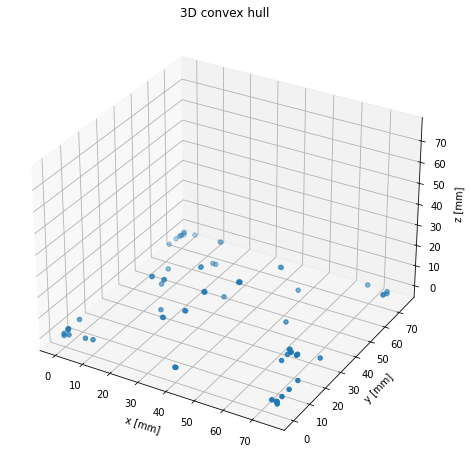

In [33]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points_in_mm[:,0], points_in_mm[:,1], points_in_mm[:,2])
ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
ax.set_zlabel("z [mm]")

# Make axes limits 
xyzlim = np.array([ax.get_xlim3d(),ax.get_ylim3d(),ax.get_zlim3d()]).T
XYZlim = [min(xyzlim[0]),max(xyzlim[1])]
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim)
ax.set_title("3D convex hull")
plt.show()